In [2]:
print(" Murali's First end to end project")
print (" This is what you always wanted to do ")
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.linear_model import BayesianRidge, LinearRegression,LogisticRegression
 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

 Murali's First end to end project
 This is what you always wanted to do 


In [3]:
# Import the data 
# Decide on the variable types 
# Everything is learning

inputfile = "/Users/murali/SMU/lab2/SMUMSDS2016/data/income.csv"
dfincome = pd.read_csv(inputfile)
dfincome.info()
dfincome.columns
dfincome.index
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


RangeIndex(start=0, stop=32561, step=1)

In [4]:
# Work with work class
# work with education
# work with education_num
# Work with maritial_status 
# work with Occupation
# work with race 
# work with sex 
# work with capitalgain
# work with capital loss 
# work with hours-per-week

dfincome.workclass = dfincome.workclass.replace(' ?','NotReported')
dfincome.occupation = dfincome.occupation.replace(' ?','NotReported')
dfincome.workclass = dfincome.workclass.str.strip().replace('Never-worked','NotWorked')
dfincome['native-country'] = dfincome['native-country'].replace(' ?','NotReported')
dfincome['native-country'] = dfincome['native-country'].str.strip().replace('United-States','US')
#dfincome.targetfinal = dfincome.target.str.strip().replace('>50K',1)
#dfincome.targetfinal = dfincome.targetfinal.str.strip().replace(' <=50K','0')


# Update Native Country 
#nativecountry = []
#for row in dfincome['native-country']:
#    if row.strip() == 'United-States':
#         nativecountry.append('US') 

 #   else:
#         nativecountry.append(row)
#dfincome['native-country'] = nativecountry

#wclass = []
#for row in dfincome['workclass']:
#    if row.strip() == 'Never-worked':
#         wclass.append('Neverworked') 

#    else:
#         wclass.append(row)
#dfincome['workclass'] = wclass 


targetfinal = []
for row in dfincome['target']:
    if row.strip() == '<=50K':
        targetfinal.append(0) 
    
    else:
        targetfinal.append(1)
dfincome['targetfinal'] = targetfinal



In [5]:
dfincome.targetfinal.unique()

array([0, 1])

In [6]:
dfabove50K = pd.DataFrame()
dfbelow50K = pd.DataFrame()
#dfbelow50K = dfincome[[df]'age'].dfincome[dfincome['target'].str.strip() == '<=50K']
#dfbelow50K = dfincome[dfincome['age'] & dfincome['targetfinal'] == '0' ]
#dfabove50K = dfincome[dfincome['target'].str.strip() == '>50K']

dfbelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['age','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['age','targetfinal']])


In [7]:
dfbelow50K['COUNTER'] = 1
dfabove50K['COUNTER'] = 1
dfbelow50K =  dfbelow50K.groupby('age')['COUNTER'].count() 
dfabove50K = dfabove50K.groupby('age')['COUNTER'].count()

 

 
 
 

In [8]:
dfincome.targetfinal.unique()

array([0, 1])

In [9]:
#type(dfbelow50K)
#dfbelow50K 

X = []
Y1 = []
for row in dfbelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfabove50K.iteritems():
    Y2.append(row[1])
    

 

In [10]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title=" Age",
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')


In [11]:
# Heat Map for Age 
# Index is the age
# Create a Pandas Series 
 
dfageHeatmap1 = pd.DataFrame()
dfageHeatmap2 = pd.DataFrame()
 
dfageHeatmap1['<50K'] = Y1
dfageHeatmap2['>=50K'] = Y2
dfageHeatMap = pd.concat([dfageHeatmap1,dfageHeatmap2], ignore_index=True, axis=1)
dfageHeatMap.index = X
dfageHeatMap.columns = ['<50K','>=50K']

dfageHeatMap['>=50K'].fillna('0',inplace=True)

# Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfageHeatMap.columns , z=dfageHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")


In [12]:
dfageHeatMap.columns

Index([u'<50K', u'>=50K'], dtype='object')

In [12]:
# Get education-num  and get marital-status 

dfedubelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['education-num','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfeduabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['education-num','targetfinal']])

dfedubelow50K['COUNTER'] = 1
dfeduabove50K['COUNTER'] = 1
dfedubelow50K =  dfedubelow50K.groupby('education-num')['COUNTER'].count() 
dfeduabove50K = dfeduabove50K.groupby('education-num')['COUNTER'].count()

In [13]:
X = []
Y1 = []
for row in dfedubelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfeduabove50K.iteritems():
    Y2.append(row[1])

In [14]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title='Number of years of Education',
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [15]:
dfeduHeatmap1 = pd.DataFrame()
dfeduHeatmap2 = pd.DataFrame()
 
dfeduHeatmap1['<50K'] = Y1
dfeduHeatmap2['>=50K'] = Y2
dfeduHeatMap = pd.concat([dfeduHeatmap1,dfeduHeatmap2], ignore_index=True, axis=1)
dfeduHeatMap.index = X
dfeduHeatMap.columns = ['<50K','>=50K']

dfeduHeatMap['>=50K'].fillna('0',inplace=True)

 # Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfeduHeatMap.columns , z=dfeduHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")

In [16]:
# Get education-num  and get marital-status 

dfmarbelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['marital-status','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfmarabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['marital-status','targetfinal']])

dfmarbelow50K['COUNTER'] = 1
dfmarabove50K['COUNTER'] = 1
dfmarbelow50K =  dfmarbelow50K.groupby('marital-status')['COUNTER'].count() 
dfmarabove50K = dfmarabove50K.groupby('marital-status')['COUNTER'].count()

In [17]:
X = []
Y1 = []
for row in dfmarbelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfmarabove50K.iteritems():
    Y2.append(row[1])

In [18]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='cnpsap', api_key='nbs9yo1y2j')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title='Marital Status',
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [19]:
dfmarHeatmap1 = pd.DataFrame()
dfmarHeatmap2 = pd.DataFrame()
 
dfmarHeatmap1['<50K'] = Y1
dfmarHeatmap2['>=50K'] = Y2
dfmarHeatMap = pd.concat([dfmarHeatmap1,dfmarHeatmap2], ignore_index=True, axis=1)
dfmarHeatMap.index = X
dfmarHeatMap.columns = ['<50K','>=50K']

dfmarHeatMap['>=50K'].fillna('0',inplace=True)

 # Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfmarHeatMap.columns , z=dfmarHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")

In [21]:
# Start Linear Regression and Logistic Regression 
# First let us transform using dummies 
# Let us draw and build the Bar chart , Line chart , Heat Map 
# Tasks Linear Regression , PAC , LCA, Logistics Regression - 2 hours 
# Detailed Task - Create Dummies 

#dfincome.info()


In [20]:
# Linear Regression 

#dfintermediate = dfincome
# Drop columns 
#dfintermediate = dfincome.drop('fnlwgt',axis=1)
#dfintermediate = dfincome.drop('target',axis=1)
#dfintermediate = dfincome.drop('targetfinal',axis=1)

 

#dfintermediate.drop('fnlwgt',axis=1,inplace=True)
#dfintermediate.drop('target',axis=1,inplace=True)
#dfintermediate.drop('targetfinal',axis=1,inplace=True)
dfintermediate = dfincome.copy()



In [21]:
dfintermediate.drop('fnlwgt',axis=1,inplace=True)
dfintermediate.drop('target',axis=1,inplace=True)
dfintermediate.drop('targetfinal',axis=1,inplace=True)

In [22]:
dfintermediate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [23]:
dfintermediate.values

array([[39, 'State-gov', ' Bachelors', ..., 0, 40, 'US'],
       [50, 'Self-emp-not-inc', ' Bachelors', ..., 0, 13, 'US'],
       [38, 'Private', ' HS-grad', ..., 0, 40, 'US'],
       ..., 
       [58, 'Private', ' HS-grad', ..., 0, 40, 'US'],
       [22, 'Private', ' HS-grad', ..., 0, 20, 'US'],
       [52, 'Self-emp-inc', ' HS-grad', ..., 0, 40, 'US']], dtype=object)

In [24]:
 
# Do the Dummies 
df_dummies = pd.get_dummies(dfintermediate)
df_dummies.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_NotReported,workclass_NotWorked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_US,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,0,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13,0,0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Let us do Linear Regression 

income_x = df_dummies.values
income_y = dfincome['targetfinal']

# Split Data into train and test 
income_X_train = income_x[:-20]
income_X_test = income_x[-20:]

income_y_train = income_y[:-20]
income_y_test = income_y[-20:]

#print income_y_train

regr = linear_model.LinearRegression()
regr.fit(income_X_train, income_y_train)
#print('Coefficients: \n', regr.coef_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#df_coeff['Coefficients'] = regr.coef_

regr.coef_.size

107

In [27]:
dfc = pd.DataFrame()
dfc['Features'] = df_dummies.columns
dfc['coefficients'] = regr.coef_

In [31]:
#dfc

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=dfc['coefficients'],
            y=dfc['Features'],
            orientation = 'h'
)]

py.iplot(data, filename='horizontal-bar')

# Number of Years of education is highly co related with the target 


In [29]:
# The mean squared error
#print("Mean squared error: %.2f"
   #   % np.mean((regr.predict(income_X_test) - income_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
#C
#print ( ( regr.predict(income_X_test) - (income_y_test) )

 #print (income_y_test)
#print regr.predict(income_X_test).size

#income_y_test.size
#np.mean((regr.predict(income_X_test) - income_y_test) ** 2)
#% np.mean((regr.predict(income_X_test) - income_y_test) ** 2)

print('Variance score: %.2f' % regr.score(income_X_test, income_y_test))

#print("Mean squared error: %.2f"
   #   % np.mean((regr.predict(income_X_test) - income_y_test) ** 2))


Variance score: 0.33


In [30]:
clf = BayesianRidge(compute_score=True)
clf.fit(income_X_train, income_y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [35]:
# This code did not complete 
#n_features = income_X_train.size
#w = np.zeros(n_features)
#lw = 2
#plt.figure(figsize=(6, 5))
#plt.title("Weights of the model")
#plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
 #        label="Bayesian Ridge estimate")
#plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
#plt.plot(regr.coef_, color='navy', linestyle='--', label="OLS estimate")
#plt.xlabel("Features")
#plt.ylabel("Values of the weights")
#plt.legend(loc="best", prop=dict(size=12))

#plt.figure(figsize=(6, 5))
#plt.title("Histogram of the weights")
#plt.hist(clf.coef_, bins=n_features, color='gold', log=True)
#plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
  #          color='navy', label="Relevant features")
#plt.ylabel("Features")
#plt.xlabel("Values of the weights")
#plt.legend(loc="upper left")

#plt.figure(figsize=(6, 5))
#plt.title("Marginal log-likelihood")
#plt.plot(clf.scores_, color='navy', linewidth=lw)
#plt.ylabel("Score")
#plt.xlabel("Iterations")
#plt.show()

In [31]:
income_x

array([[  3.90000000e+01,   1.30000000e+01,   2.17400000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.00000000e+01,   1.30000000e+01,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.80000000e+01,   9.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  5.80000000e+01,   9.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.20000000e+01,   9.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.20000000e+01,   9.00000000e+00,   1.50240000e+04, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [32]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

print (" Start PCA ")
pca = decomposition.PCA(n_components=3)
pca.fit(income_x)
income_x1 = pca.transform(income_x)
pca_score = pca.explained_variance_ratio_
print pca_score
y = income_y
#V = pca.components_
#print(pca.explained_variance_ratio_) 
#print ("Components is ")
#print V
#V.size
 

 Start PCA 
[  9.97028410e-01   2.96526077e-03   3.42257018e-06]


/Users/murali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index

/Users/murali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index

/Users/murali/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index



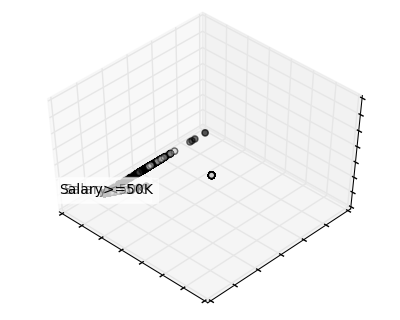

In [38]:

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Salary<50K', 0), ('Salary>=50K', 1) ]:
    ax.text3D(income_x1[y == label, 0].mean(),
              income_x1[y == label, 1].mean() + 1.5,
               income_x1[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2,0]).astype(np.float)
ax.scatter(income_x1[:, 0], income_x1[:, 1],income_x[:,2],  c=y, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [33]:
#print(pca.explained_variance_ratio_) 
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

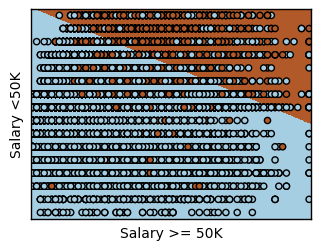

In [34]:
# Use the LabelEncoder and do PCA , LCA and Classifiers 
#dfincome.info()

# Logistic Regression 

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
# Will hit memory error so let us train only first two features 
X = income_X_train[:, :2]
Y = income_y_train
#logreg.fit(income_X_train, income_y_train)
logreg.fit(X, income_y_train)
h = .02 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#x_min, x_max = income_x.min() - .5, income_x.max() + .5
#y_min, y_max = income_x.min() - .5, income_x.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.scatter(income_x,  c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Salary >= 50K')
plt.ylabel('Salary <50K')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [53]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
type(iris.data)
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"   % (iris.data.shape[0],(iris.target != y_pred).sum()))
 

Number of mislabeled points out of a total 150 points : 6


In [60]:
 type(iris.data)

numpy.ndarray

In [90]:
# Fun Starts here 
from sklearn import datasets
  
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB() 
XG = df_dummies 
YG =  np.asarray(targetfinal )
gnb.fit(XG,YG)
gnb.predict(YG)
#y_pred = gnb.fit(incomecoded_x, income_y).predict(income_y)
#print y_pred
#print("Number of mislabeled points out of a total %d points : %d"     % (incomecoded_x.shape[0],(income_y != y_pred).sum()))
 

/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



ValueError: Expected input with 107 features, got 32561 instead

In [89]:
type(XG)

pandas.core.frame.DataFrame

In [47]:
income_x.size

3484027

In [44]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(income_x,income_y)
income_y.reshape(1,-1)
clf.predict(income_y)


/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



ValueError: shapes (1,32561) and (107,2) not aligned: 32561 (dim 1) != 107 (dim 0)

In [56]:
# Start Label Encoding 
# Do PCA and LDA for Label Encoding  
lworkclass = dfincome.workclass.unique()
le = preprocessing.LabelEncoder()
le.fit(lworkclass)
finalworkclass = le.transform(dfincome.workclass)

In [ ]:
finalworkclass

In [58]:
lmaritialStatus = dfincome['marital-status'].unique()
lemaritialstatus = preprocessing.LabelEncoder()
lemaritialstatus.fit(lmaritialStatus)
finalmaritialStatus = lemaritialstatus.transform(dfincome['marital-status'])


In [59]:
finalmaritialStatus

array([4, 2, 0, ..., 6, 4, 2])

In [60]:
loccupation = dfincome['occupation'].unique()
leoccupation = preprocessing.LabelEncoder()
leoccupation.fit(loccupation)
finaloccupation = leoccupation.transform(dfincome['occupation'])

In [61]:
finaloccupation

array([0, 3, 5, ..., 0, 0, 3])

In [62]:
#relationship
#relationship
lrelationship = dfincome['relationship'].unique()
lerelationship = preprocessing.LabelEncoder()
lerelationship.fit(lrelationship)
finalrelationship = lerelationship.transform(dfincome['relationship'])

In [63]:
#race
#race
lrace = dfincome['race'].unique()
lerace = preprocessing.LabelEncoder()
lerace.fit(lrace)
finalrace = lerace.transform(dfincome['race'])

In [64]:
lsex = dfincome['sex'].unique()
lesex = preprocessing.LabelEncoder()
lesex.fit(lsex)
finalsex = lesex.transform(dfincome['sex'])

In [65]:
lnativecountry = dfincome['native-country'].unique()
lenativecountry = preprocessing.LabelEncoder()
lenativecountry.fit(lnativecountry)
finalnativecountry = lenativecountry.transform(dfincome['native-country'])

In [66]:
lneducation = dfincome['education'].unique()
leeducation = preprocessing.LabelEncoder()
leeducation.fit(lneducation)
finaleducation = leeducation.transform(dfincome['education'])

In [67]:
dfincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
targetfinal       32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [68]:
from sklearn.preprocessing import MinMaxScaler
lcapitalgain = MinMaxScaler(feature_range=(0,100)).fit_transform(dfincome['capital-gain'])
lcapitalloss = MinMaxScaler(feature_range=(0,100)).fit_transform(dfincome['capital-loss'])
lhoursofweek = MinMaxScaler(feature_range=(0,40)).fit_transform(dfincome['hours-per-week'])
leducationnum = MinMaxScaler(feature_range=(0,25)).fit_transform(dfincome['education-num'])

/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxS

In [70]:
# Assemble the dataFrame and start the classifiers 
# create a new series and start play with LCA and classifiers 

dfincomecoded = pd.DataFrame()
dfincomecoded['workclass'] = finalworkclass
dfincomecoded['maritialstatus'] = finalmaritialStatus
dfincomecoded['relationship'] = finalrelationship
dfincomecoded['race'] = finalrace
dfincomecoded['sex'] = finalsex
dfincomecoded['nativecountry'] = finalnativecountry
dfincomecoded['education'] = finaleducation
dfincomecoded['capitalgain'] = lcapitalgain
dfincomecoded['capitalloss'] = lcapitalloss
dfincomecoded['hoursperweek'] = lhoursofweek
dfincomecoded['educationNum'] = leducationnum
dfincomecoded['targetFinal']  = dfincome['targetfinal']
 



In [71]:
dfincomecoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
workclass         32561 non-null int64
maritialstatus    32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
nativecountry     32561 non-null int64
education         32561 non-null int64
capitalgain       32561 non-null float64
capitalloss       32561 non-null float64
hoursperweek      32561 non-null float64
educationNum      32561 non-null float64
targetFinal       32561 non-null int64
dtypes: float64(4), int64(8)
memory usage: 3.0 MB


In [2]:
income_y = dfincomecoded['targetFinal'].as_matrix()

incomecoded_x = dfincomecoded.drop['targetFinal']
 


NameError: name 'dfincomecoded' is not defined

In [96]:
income_y.size

32561

In [87]:
#income_y = income_y.reshape(1,-1)

In [90]:
# Fun starts now 
# Start with Bayes Classifier 


from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(incomecoded_x,income_y)
gnb.predict(income_y)
#y_pred = gnb.fit(incomecoded_x, income_y).predict(income_y)
#print y_pred
#print("Number of mislabeled points out of a total %d points : %d"     % (incomecoded_x.shape[0],(income_y != y_pred).sum()))
 


/Users/murali/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



ValueError: operands could not be broadcast together with shapes (1,32561) (12,) 